<a href="https://colab.research.google.com/github/bpandey369/Fast-tag-Fraud-detection/blob/main/Fast_tag_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [7]:
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/bpandey369/Fast-tag-Fraud-detection/main/FastagFraudDetection.csv')

In [8]:
# 1. Data Exploration
# Explore the dataset
print(data.head())
print(data.info())
print(data.describe())


   Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.059816123454882, 77.77068662374292  

In [9]:
# Check the distribution of fraud indicators
fraud_distribution = data['Fraud_indicator'].value_counts()
print(fraud_distribution)

Not Fraud    4017
Fraud         983
Name: Fraud_indicator, dtype: int64


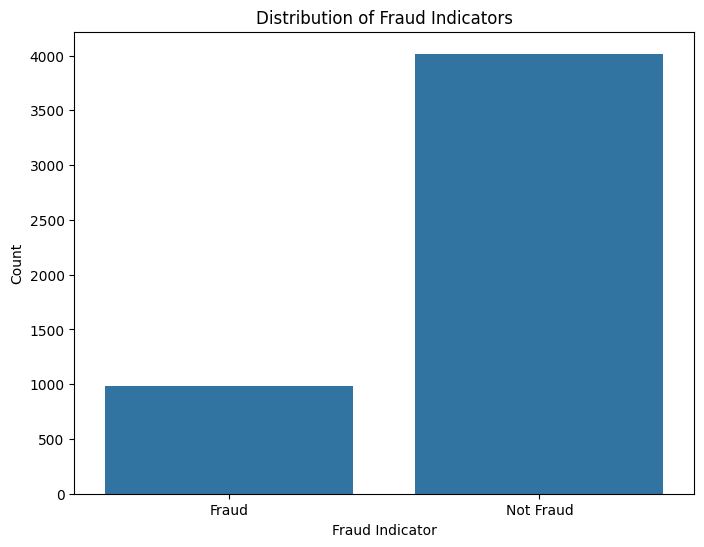

In [10]:
# Visualize the distribution of fraud indicators
plt.figure(figsize=(8, 6))
sns.countplot(x='Fraud_indicator', data=data)
plt.title('Distribution of Fraud Indicators')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()


In [11]:
# 2. Feature Engineering
# Identify and engineer relevant features
# Example: Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['Vehicle_Type', 'Lane_Type'])

In [20]:
# 3. Model Development
# Split the data into train and test sets
X = data.drop(['Transaction_ID', 'Timestamp', 'Fraud_indicator'], axis=1)[['Transaction_Amount',
       'Amount_paid', 'Vehicle_Speed',
       'Vehicle_Type_Bus ', 'Vehicle_Type_Car',
       'Vehicle_Type_Motorcycle', 'Vehicle_Type_SUV', 'Vehicle_Type_Sedan',
       'Vehicle_Type_Truck', 'Vehicle_Type_Van', 'Lane_Type_Express',
       'Lane_Type_Regular']]
y = data['Fraud_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
# Train a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [25]:
# Evaluate model performance
y_pred = rf_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.996


              precision    recall  f1-score   support

       Fraud       1.00      0.98      0.99       217
   Not Fraud       0.99      1.00      1.00       783

    accuracy                           1.00      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      1.00      1.00      1000



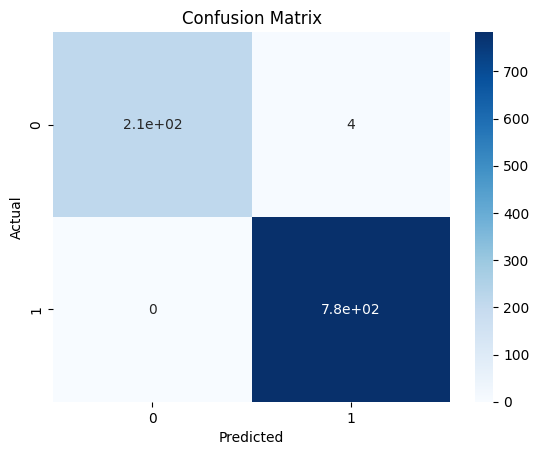

In [26]:
# Classification report and confusion matrix
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [27]:
# 4. Real-time Fraud Detection (Implementation not included)

In [28]:
# 5. Explanatory Analysis
# Explore factors contributing to fraudulent transactions
# Example: Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                    Feature  Importance
1               Amount_paid    0.562090
0        Transaction_Amount    0.252246
2             Vehicle_Speed    0.039134
5   Vehicle_Type_Motorcycle    0.033304
4          Vehicle_Type_Car    0.029752
6          Vehicle_Type_SUV    0.021937
3         Vehicle_Type_Bus     0.017035
8        Vehicle_Type_Truck    0.016999
9          Vehicle_Type_Van    0.013403
7        Vehicle_Type_Sedan    0.009465
10        Lane_Type_Express    0.002714
11        Lane_Type_Regular    0.001922


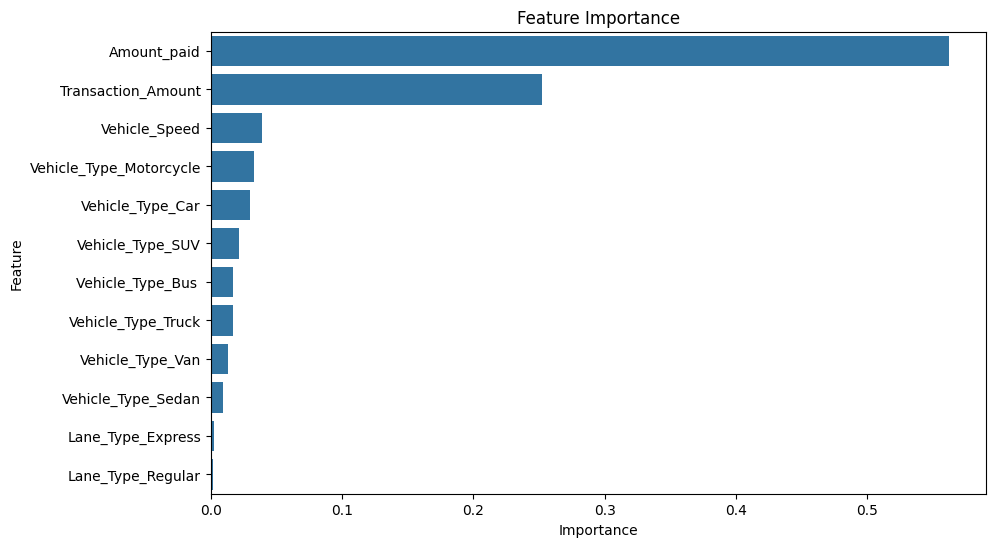

In [29]:

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
